# EDA

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from Dataframes import sociedades_df, contratos_df, pagos_df, requisitos_df, ofertas_df, sociedades_con_contrato_df

Tratare de decifrar si existe alguna relacion entre los factores de los contratos y el retraso

In [21]:
posibles_factores = ['REGIONGEOGRAFICA', 'SERVICIO', 'TIPOGASTO', 'ESTADO', 'FECHAINICIO',
                     'FECHATERMINO', 'FECHATERMINOORIGINAL','MODALIDADLICITACION',
                     'MODALIDADCONTRATACION', 'TIPOREAJUSTE', 'AVANCEFINANCIERO', 'MANDANTE']

In [22]:
contratos_df.dtypes

REGIONGEOGRAFICA               category
CODIGOCONTRATO                    int64
CODIGOBIP                        object
NOMBRECONTRATO                   object
SERVICIO                       category
CENTROGESTION                    object
TIPOGASTO                      category
ESTADO                         category
FECHAINICIO              datetime64[ns]
FECHATERMINO             datetime64[ns]
FECHATERMINOORIGINAL     datetime64[ns]
MONTOINICIAL                      int64
MONTOVIGENTE                      int64
IDCHILECOMPRA                    object
RUTADJUDICADO                     int64
NOMBREADJUDICADO                 object
MODALIDADLICITACION            category
MODALIDADCONTRATACION          category
TIPOREAJUSTE                   category
TIPO_PERFIL                    category
AVANCEFINANCIERO                float64
MANDANTE                       category
MERGERUT                         object
dtype: object

In [23]:
contratos_descubrir_atraso = contratos_df[posibles_factores]
contratos_descubrir_atraso= contratos_descubrir_atraso.dropna()
contratos_descubrir_atraso= contratos_descubrir_atraso.drop_duplicates()
contratos_descubrir_atraso['DIRFERENCIAFECHATERMINO'] = contratos_descubrir_atraso['FECHATERMINO'] - contratos_descubrir_atraso['FECHATERMINOORIGINAL']
contratos_descubrir_atraso.head()

,REGIONGEOGRAFICA,SERVICIO,TIPOGASTO,ESTADO,FECHAINICIO,FECHATERMINO,FECHATERMINOORIGINAL,MODALIDADLICITACION,MODALIDADCONTRATACION,TIPOREAJUSTE,AVANCEFINANCIERO,MANDANTE,DIRFERENCIAFECHATERMINO
0,Tarapacá,ARQUITECTURA,Obra,En Ejecución,2013-07-17,2013-07-27,2013-07-27,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,0.0,Externos,0 days
1,Atacama,ARQUITECTURA,Obra,Terminado,2010-04-15,2010-04-30,2010-04-30,Propuesta privada,PRECIOS UNITARIOS,Sin Reajuste,0.0,Externos,0 days
2,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2015-12-03,2015-12-23,2015-12-23,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.0,Internos,0 days
3,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-10-10,2013-12-29,2013-12-29,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.0,Internos,0 days
4,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-05-31,2013-12-21,2013-11-27,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.0,Internos,24 days


In [24]:
contratos_descubrir_atraso['DIRFERENCIAFECHATERMINO'] = contratos_descubrir_atraso['DIRFERENCIAFECHATERMINO'].dt.days

In [25]:
analisando_factores_categoricos = ['SERVICIO', 'TIPOGASTO','MODALIDADLICITACION',
                                   'MODALIDADCONTRATACION', 'TIPOREAJUSTE', 'MANDANTE']

dummys_contratos = pd.get_dummies(contratos_descubrir_atraso[analisando_factores_categoricos]).astype('int16')
dummys_contratos

,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,SERVICIO_I. N. HIDRAULICA,SERVICIO_O.PORTUARIAS,SERVICIO_OBRAS HIDRÁULICAS,SERVICIO_SSSR,SERVICIO_VIALIDAD,TIPOGASTO_Asesorías y Consultorías,TIPOGASTO_Estudio,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
18246,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18247,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
18248,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [26]:
columnas_contratos_atraso = list(set(posibles_factores) - set(analisando_factores_categoricos)) + ['DIRFERENCIAFECHATERMINO']
columnas_contratos_atraso

['ESTADO',
 'FECHAINICIO',
 'FECHATERMINO',
 'AVANCEFINANCIERO',
 'REGIONGEOGRAFICA',
 'FECHATERMINOORIGINAL',
 'DIRFERENCIAFECHATERMINO']

In [27]:
contratos_atraso_df = pd.concat([contratos_descubrir_atraso[columnas_contratos_atraso], dummys_contratos], axis=1)
contratos_atraso_df.head()

,ESTADO,FECHAINICIO,FECHATERMINO,AVANCEFINANCIERO,REGIONGEOGRAFICA,FECHATERMINOORIGINAL,DIRFERENCIAFECHATERMINO,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,En Ejecución,2013-07-17,2013-07-27,0.0,Tarapacá,2013-07-27,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,Terminado,2010-04-15,2010-04-30,0.0,Atacama,2010-04-30,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,Terminado,2015-12-03,2015-12-23,1.0,Aysén,2015-12-23,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,Terminado,2013-10-10,2013-12-29,1.0,Aysén,2013-12-29,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,Terminado,2013-05-31,2013-12-21,1.0,Aysén,2013-11-27,24,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [28]:
contratos_atraso_df[contratos_atraso_df['DIRFERENCIAFECHATERMINO'] == 0]

,ESTADO,FECHAINICIO,FECHATERMINO,AVANCEFINANCIERO,REGIONGEOGRAFICA,FECHATERMINOORIGINAL,DIRFERENCIAFECHATERMINO,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,En Ejecución,2013-07-17,2013-07-27,0.000000,Tarapacá,2013-07-27,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,Terminado,2010-04-15,2010-04-30,0.000000,Atacama,2010-04-30,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,Terminado,2015-12-03,2015-12-23,1.000000,Aysén,2015-12-23,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,Terminado,2013-10-10,2013-12-29,1.000000,Aysén,2013-12-29,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5,Terminado,2010-09-14,2010-12-23,1.000000,Aysén,2010-12-23,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,En Ejecución,2024-05-16,2024-05-21,0.999996,Metropolitana de Santiago,2024-05-21,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
18246,En Ejecución,2024-05-28,2024-06-28,1.000000,Los Ríos,2024-06-28,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18247,Terminado,2024-05-16,2024-05-26,1.000000,Aysén,2024-05-26,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
18248,En Ejecución,2024-06-24,2024-07-01,0.000000,Biobío,2024-07-01,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [29]:
contratos_atraso_df[contratos_atraso_df.columns[7:]]

,SERVICIO_AEROPUERTOS,SERVICIO_ARQUITECTURA,SERVICIO_D.G.O.P.,SERVICIO_I. N. HIDRAULICA,SERVICIO_O.PORTUARIAS,SERVICIO_OBRAS HIDRÁULICAS,SERVICIO_SSSR,SERVICIO_VIALIDAD,TIPOGASTO_Asesorías y Consultorías,TIPOGASTO_Estudio,...,MODALIDADCONTRATACION_PAGO CONTRA RECEPCION,MODALIDADCONTRATACION_PRECIOS UNITARIOS,MODALIDADCONTRATACION_SUMA ALZADA,MODALIDADCONTRATACION_SUMA ALZADA Y PRECIOS UNIT,TIPOREAJUSTE_Indice Polinomico,TIPOREAJUSTE_Indice de Precios al Consumidor,TIPOREAJUSTE_Otros,TIPOREAJUSTE_Sin Reajuste,MANDANTE_Externos,MANDANTE_Internos
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
18246,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
18247,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
18248,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(contratos_atraso_df[contratos_atraso_df.columns[7:]], 
                                                    contratos_atraso_df['DIRFERENCIAFECHATERMINO'],test_size=0.2, random_state=42)

In [39]:
escalar = StandardScaler()
escalar = escalar.fit(X_train)
X_test= escalar.transform(X_test)
X_train= escalar.transform(X_train)

In [40]:
from sklearn.linear_model import LinearRegression

predictor_multi_lineal = LinearRegression()
predictor_multi_lineal.fit(X_train, y_train)

LinearRegression()

In [41]:
y_predichos = predictor_multi_lineal.predict(X_test)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_predichos, y_test)

-21.004281728864136

In [37]:
contratos_descubrir_atraso

,REGIONGEOGRAFICA,SERVICIO,TIPOGASTO,ESTADO,FECHAINICIO,FECHATERMINO,FECHATERMINOORIGINAL,MODALIDADLICITACION,MODALIDADCONTRATACION,TIPOREAJUSTE,AVANCEFINANCIERO,MANDANTE,DIRFERENCIAFECHATERMINO
0,Tarapacá,ARQUITECTURA,Obra,En Ejecución,2013-07-17,2013-07-27,2013-07-27,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,0.000000,Externos,0
1,Atacama,ARQUITECTURA,Obra,Terminado,2010-04-15,2010-04-30,2010-04-30,Propuesta privada,PRECIOS UNITARIOS,Sin Reajuste,0.000000,Externos,0
2,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2015-12-03,2015-12-23,2015-12-23,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.000000,Internos,0
3,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-10-10,2013-12-29,2013-12-29,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.000000,Internos,0
4,Aysén,OBRAS HIDRÁULICAS,Obra,Terminado,2013-05-31,2013-12-21,2013-11-27,Propuesta publica,SUMA ALZADA,Sin Reajuste,1.000000,Internos,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,Metropolitana de Santiago,ARQUITECTURA,Asesorías y Consultorías,En Ejecución,2024-05-16,2024-05-21,2024-05-21,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,0.999996,Internos,0
18246,Los Ríos,O.PORTUARIAS,Obra,En Ejecución,2024-05-28,2024-06-28,2024-06-28,Trato directo,PRECIOS UNITARIOS,Sin Reajuste,1.000000,Internos,0
18247,Aysén,O.PORTUARIAS,Obra,Terminado,2024-05-16,2024-05-26,2024-05-26,Trato directo,PAGO CONTRA RECEPCION,Sin Reajuste,1.000000,Internos,0
18248,Biobío,VIALIDAD,Obra,En Ejecución,2024-06-24,2024-07-01,2024-07-01,Trato directo,PAGO CONTRA RECEPCION,Indice de Precios al Consumidor,0.000000,Internos,0


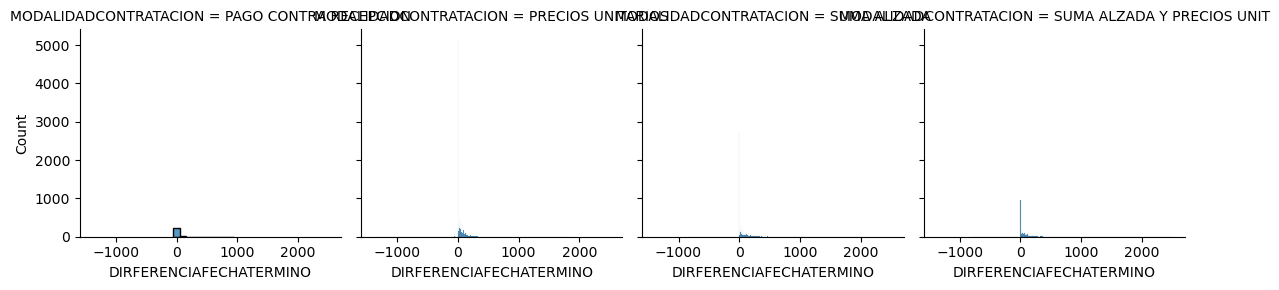

In [38]:
grafico = sns.FacetGrid(data=contratos_descubrir_atraso, col='MODALIDADCONTRATACION', margin_titles=True)
grafico.map(sns.histplot, 'DIRFERENCIAFECHATERMINO')